In [2]:
import importlib
import numpy as np
import sys
import time
sys.path.append('../../')


from astroLuSt.monitoring import timers as almoti
from astroLuSt.styles import plot_styles as alstps

importlib.reload(almoti)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()

# ExecTimer

## Standard Usage

In [3]:


importlib.reload(almoti)

ET = almoti.ExecTimer(verbose=1)

ET.checkpoint_start('Sup Task', comment='Global Task')

ET.checkpoint_start('Sub Task1')
time.sleep(2)
ET.checkpoint_end('Sub Task1')
ET.checkpoint_start('Sub Task2')
time.sleep(3)
ET.checkpoint_end('Sub Task2', comment='TEST')

ET.checkpoint_end('Sup Task')

ET.estimate_runtime('Sup Task', nrepeats=4, ndone=1)

ET.df_protocoll



######################################################################
INFO: Started Sup Task at 2024-11-08T17:02:43

######################################################################
INFO: Started Sub Task1 at 2024-11-08T17:02:43

INFO: Finished Sub Task1 at 2024-11-08T17:02:45
Required time: 0 days 00:00:02
######################################################################

######################################################################
INFO: Started Sub Task2 at 2024-11-08T17:02:45

INFO: Finished Sub Task2 at 2024-11-08T17:02:48
Required time: 0 days 00:00:03
######################################################################

INFO: Finished Sup Task at 2024-11-08T17:02:48
Required time: 0 days 00:00:05
######################################################################
INFO: Total estimated runtime for 4 repeats: 20000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Sup Task,2024-11-08 17:02:43,2024-11-08 17:02:48,0 days 00:00:05,1.731085e+09,1.731085e+09,5.020368,Global Task,
1,Sub Task1,2024-11-08 17:02:43,2024-11-08 17:02:45,0 days 00:00:02,1.731085e+09,1.731085e+09,2.006025,,
2,Sub Task2,2024-11-08 17:02:45,2024-11-08 17:02:48,0 days 00:00:03,1.731085e+09,1.731085e+09,3.004515,,TEST


## Usage to have an up-to-date estimate of runtimes

In [4]:

#initialize the timer
ET = almoti.ExecTimer(verbose=0)

repeats = 5 #number of times to repeat the loop


#Execute some loop
ET.checkpoint_start('Global Task')  #to monitor total (actual) duration
for idx in range(repeats):

    #monitor duration of each loop-execution
    ET.checkpoint_start(f'Subtask{idx}')

    #generate random sleeptime (should average out to be 1)
    time.sleep(np.random.normal(1, 0.5, size=1)[0])
    
    ET.checkpoint_end(f'Subtask{idx}')

    #estimate the runtime from the current point of view
    ET.estimate_runtime(r'Subtask', repeats, idx+1)

ET.checkpoint_end('Global Task')

ET.df_protocoll

INFO: Total estimated runtime for 5 repeats: 10000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-11-08 17:02:56,2024-11-08 17:03:01,0 days 00:00:05,1.731085e+09,1.731085e+09,4.967394,,
1,Subtask0,2024-11-08 17:02:56,2024-11-08 17:02:58,0 days 00:00:02,1.731085e+09,1.731085e+09,1.279808,,
2,Subtask1,2024-11-08 17:02:58,2024-11-08 17:02:58,0 days 00:00:00,1.731085e+09,1.731085e+09,0.583694,,
3,Subtask2,2024-11-08 17:02:58,2024-11-08 17:02:59,0 days 00:00:01,1.731085e+09,1.731085e+09,0.762879,,
4,Subtask3,2024-11-08 17:02:59,2024-11-08 17:03:00,0 days 00:00:01,1.731085e+09,1.731085e+09,0.972310,,
5,Subtask4,2024-11-08 17:03:00,2024-11-08 17:03:01,0 days 00:00:01,1.731085e+09,1.731085e+09,1.353157,,


## Usage as decorator

### Timing one function

In [5]:
ET.verbose = 1
@ET.time_exec(start_kwargs={'comment':'timed_func'})
def timed_func():
    time.sleep(np.random.rand())
    return 'FINISHED'
tf = timed_func()



######################################################################
INFO: Started Decorator Task at 2024-11-08T17:03:04

INFO: Finished Decorator Task at 2024-11-08T17:03:04
Required time: 0 days 00:00:00
######################################################################


### Getting execution statistics

/home/lukas/github/astroLuSt/demos/monitoring/../../astroLuSt/monitoring/timers.py:444: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
7,get_execstats(),2024-11-08 17:03:06,2024-11-08 17:03:07,0 days 00:00:01,1.731085e+09,1.731085e+09,0.820133,__get_execstats()__,__get_execstats()__
8,get_execstats()1,2024-11-08 17:03:07,2024-11-08 17:03:07,0 days 00:00:00,1.731085e+09,1.731085e+09,0.380493,__get_execstats()__,__get_execstats()__
9,get_execstats()2,2024-11-08 17:03:07,2024-11-08 17:03:08,0 days 00:00:01,1.731085e+09,1.731085e+09,0.314082,__get_execstats()__,__get_execstats()__
10,get_execstats()3,2024-11-08 17:03:08,2024-11-08 17:03:08,0 days 00:00:00,1.731085e+09,1.731085e+09,0.460219,__get_execstats()__,__get_execstats()__
11,get_execstats()4,2024-11-08 17:03:08,2024-11-08 17:03:09,0 days 00:00:01,1.731085e+09,1.731085e+09,0.370762,__get_execstats()__,__get_execstats()__
12,get_execstats()5,2024-11-08 17:03:09,2024-11-08 17:03:09,0 days 00:00:00,1.731085e+09,1.731085e+09,0.298952,__get_execstats()__,__get_execstats()__
13,get_execstats()6,2024-11-08 17:03:09,2024-11-08 17:03:09,0 days 00:00:00,1.731085e+09,1.731085e+09,0.452968,__get_execstats()__,__get_execstats()__
14,get_execstats()7,2024-11-08 17:03:09,2024-11-08 17:03:09,0 days 00:00:00,1.731085e+09,1.731085e+09,0.109243,__get_execstats()__,__get_execstats()__
15,get_execstats()8,2024-11-08 17:03:09,2024-11-08 17:03:10,0 days 00:00:01,1.731085e+09,1.731085e+09,0.551232,__get_execstats()__,__get_execstats()__
16,get_execstats()9,2024-11-08 17:03:10,2024-11-08 17:03:10,0 days 00:00:00,1.731085e+09,1.731085e+09,0.496771,__get_execstats()__,__get_execstats()__


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-11-08 17:02:56,2024-11-08 17:03:01,0 days 00:00:05,1.731085e+09,1.731085e+09,4.967394,,
1,Subtask0,2024-11-08 17:02:56,2024-11-08 17:02:58,0 days 00:00:02,1.731085e+09,1.731085e+09,1.279808,,
2,Subtask1,2024-11-08 17:02:58,2024-11-08 17:02:58,0 days 00:00:00,1.731085e+09,1.731085e+09,0.583694,,
3,Subtask2,2024-11-08 17:02:58,2024-11-08 17:02:59,0 days 00:00:01,1.731085e+09,1.731085e+09,0.762879,,
4,Subtask3,2024-11-08 17:02:59,2024-11-08 17:03:00,0 days 00:00:01,1.731085e+09,1.731085e+09,0.972310,,
5,Subtask4,2024-11-08 17:03:00,2024-11-08 17:03:01,0 days 00:00:01,1.731085e+09,1.731085e+09,1.353157,,
6,Decorator Task,2024-11-08 17:03:04,2024-11-08 17:03:04,0 days 00:00:00,1.731085e+09,1.731085e+09,0.470731,timed_func,


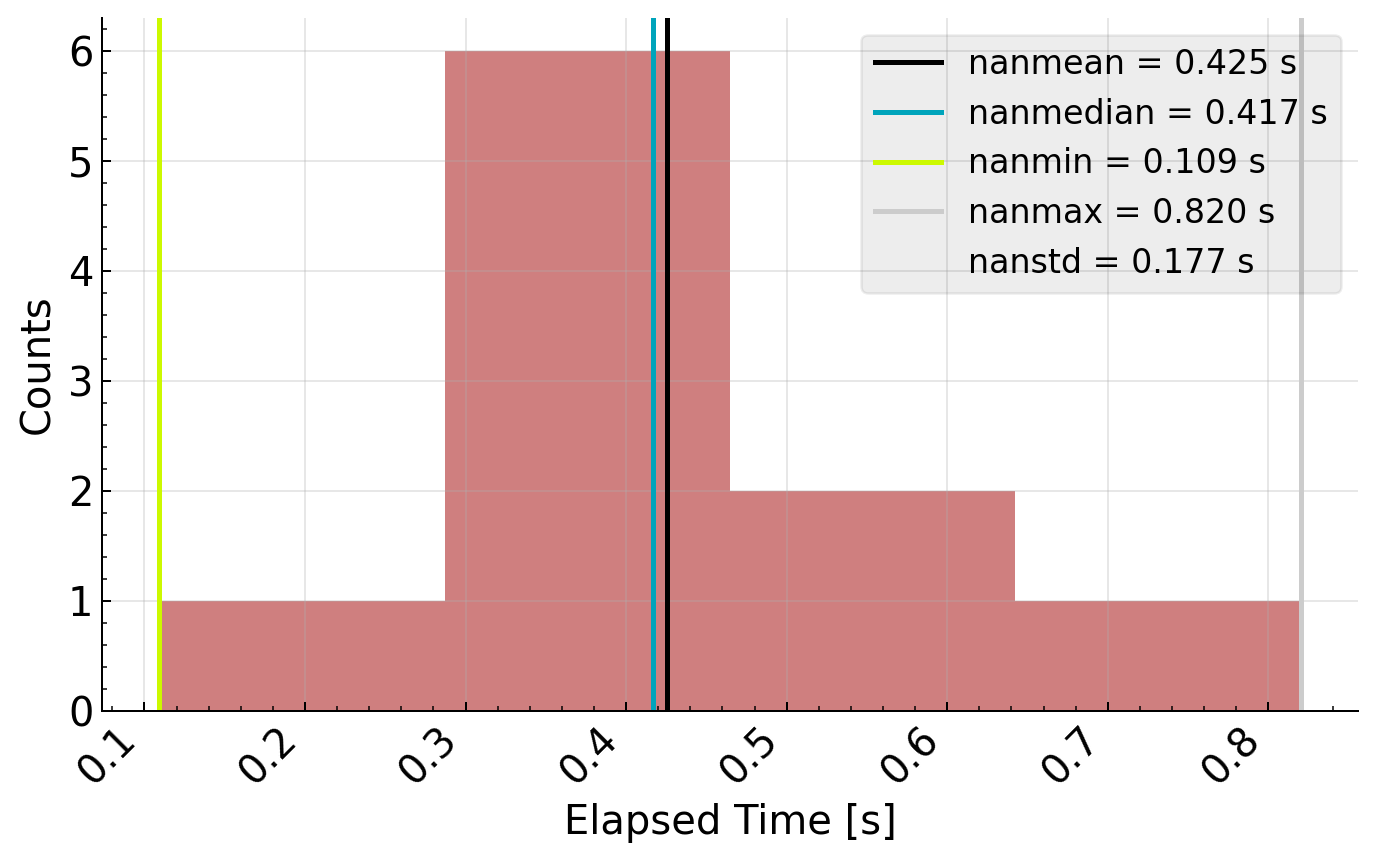

In [6]:
ET.verbose = 0
@ET.get_execstats(n=10, metrics=None, drop_from_df_protocoll=True)
def evaluated_func():
    time.sleep(np.random.rand())
        
    return 'FINISHED'



df_execstats, fig = evaluated_func()

display(df_execstats)

display(ET.df_protocoll)

